In [17]:
import torch.nn as nn

In [18]:
linear_model = nn.Linear(1,1)
linear_model

Linear(in_features=1, out_features=1, bias=True)

In [19]:
linear_model.weight

Parameter containing:
tensor([[-0.6332]], requires_grad=True)

In [20]:
linear_model.bias

Parameter containing:
tensor([0.9559], requires_grad=True)

In [21]:
# 举个例子来说明 nn.models 天然支持多 batch
import torch

In [22]:
x = torch.ones(10,1)
linear_model(x)

tensor([[0.3226],
        [0.3226],
        [0.3226],
        [0.3226],
        [0.3226],
        [0.3226],
        [0.3226],
        [0.3226],
        [0.3226],
        [0.3226]], grad_fn=<AddmmBackward0>)

In [23]:
# 接下来实现之前的例子
import torch.optim as optim
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # batch * in_feature
t_u = torch.tensor(t_u).unsqueeze(1) # batch * in_feature
optimizer = optim.SGD(linear_model.parameters(),lr=1e-2) 
t_un = 0.1 * t_u # nornamize

In [24]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.6332]], requires_grad=True),
 Parameter containing:
 tensor([0.9559], requires_grad=True)]

In [25]:
n_epochs = 3000
for epoch in range(1, n_epochs + 1):
 t_p = linear_model(t_un) # 替换之前的 model 函数
 lossf = nn.MSELoss()
 loss = lossf(t_p,t_c)
 optimizer.zero_grad()
 loss.backward()
 optimizer.step()
 if epoch == 1 or epoch % 1000 == 0:
   print(f"Epoch {epoch}, Training loss {loss.item():.4f}") 

Epoch 1, Training loss 260.1380
Epoch 1000, Training loss 3.9568
Epoch 2000, Training loss 2.9620
Epoch 3000, Training loss 2.9288


In [26]:
# nn.Sequential 返回的也是一个model, 其内部由多个 model 顺序连接而成
seq_model = nn.Sequential(nn.Linear(1,13),nn.Tanh(),nn.Linear(13,1))
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [31]:
# seq_model 内部可以计算梯度的参数shape
[param.shape for param in seq_model.parameters()]
for name, param in seq_model.named_parameters():
 print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [30]:
# 也可以用有名的方式设置内部 model
from collections import OrderedDict
seq_model = nn.Sequential(OrderedDict([
 ('hidden_linear', nn.Linear(1, 8)),
 ('hidden_activation', nn.Tanh()),
 ('output_linear', nn.Linear(8, 1))
])) 
for name, param in seq_model.named_parameters():
 print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [32]:
# 访问特定子模块的参数
seq_model.output_linear.bias

Parameter containing:
tensor([0.2287], requires_grad=True)

In [34]:
n_epochs = 3000
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)
for epoch in range(1, n_epochs + 1):
 t_p = seq_model(t_un) # 替换之前的 model 函数
 lossf = nn.MSELoss()
 loss = lossf(t_p,t_c)
 optimizer.zero_grad()
 loss.backward()
 optimizer.step()
 if epoch == 1 or epoch % 1000 == 0:
   print(f"Epoch {epoch}, Training loss {loss.item():.4f}") 

Epoch 1, Training loss 185.9357
Epoch 1000, Training loss 5.3009
Epoch 2000, Training loss 3.5892
Epoch 3000, Training loss 2.1728


In [37]:
from matplotlib import pyplot as plt 

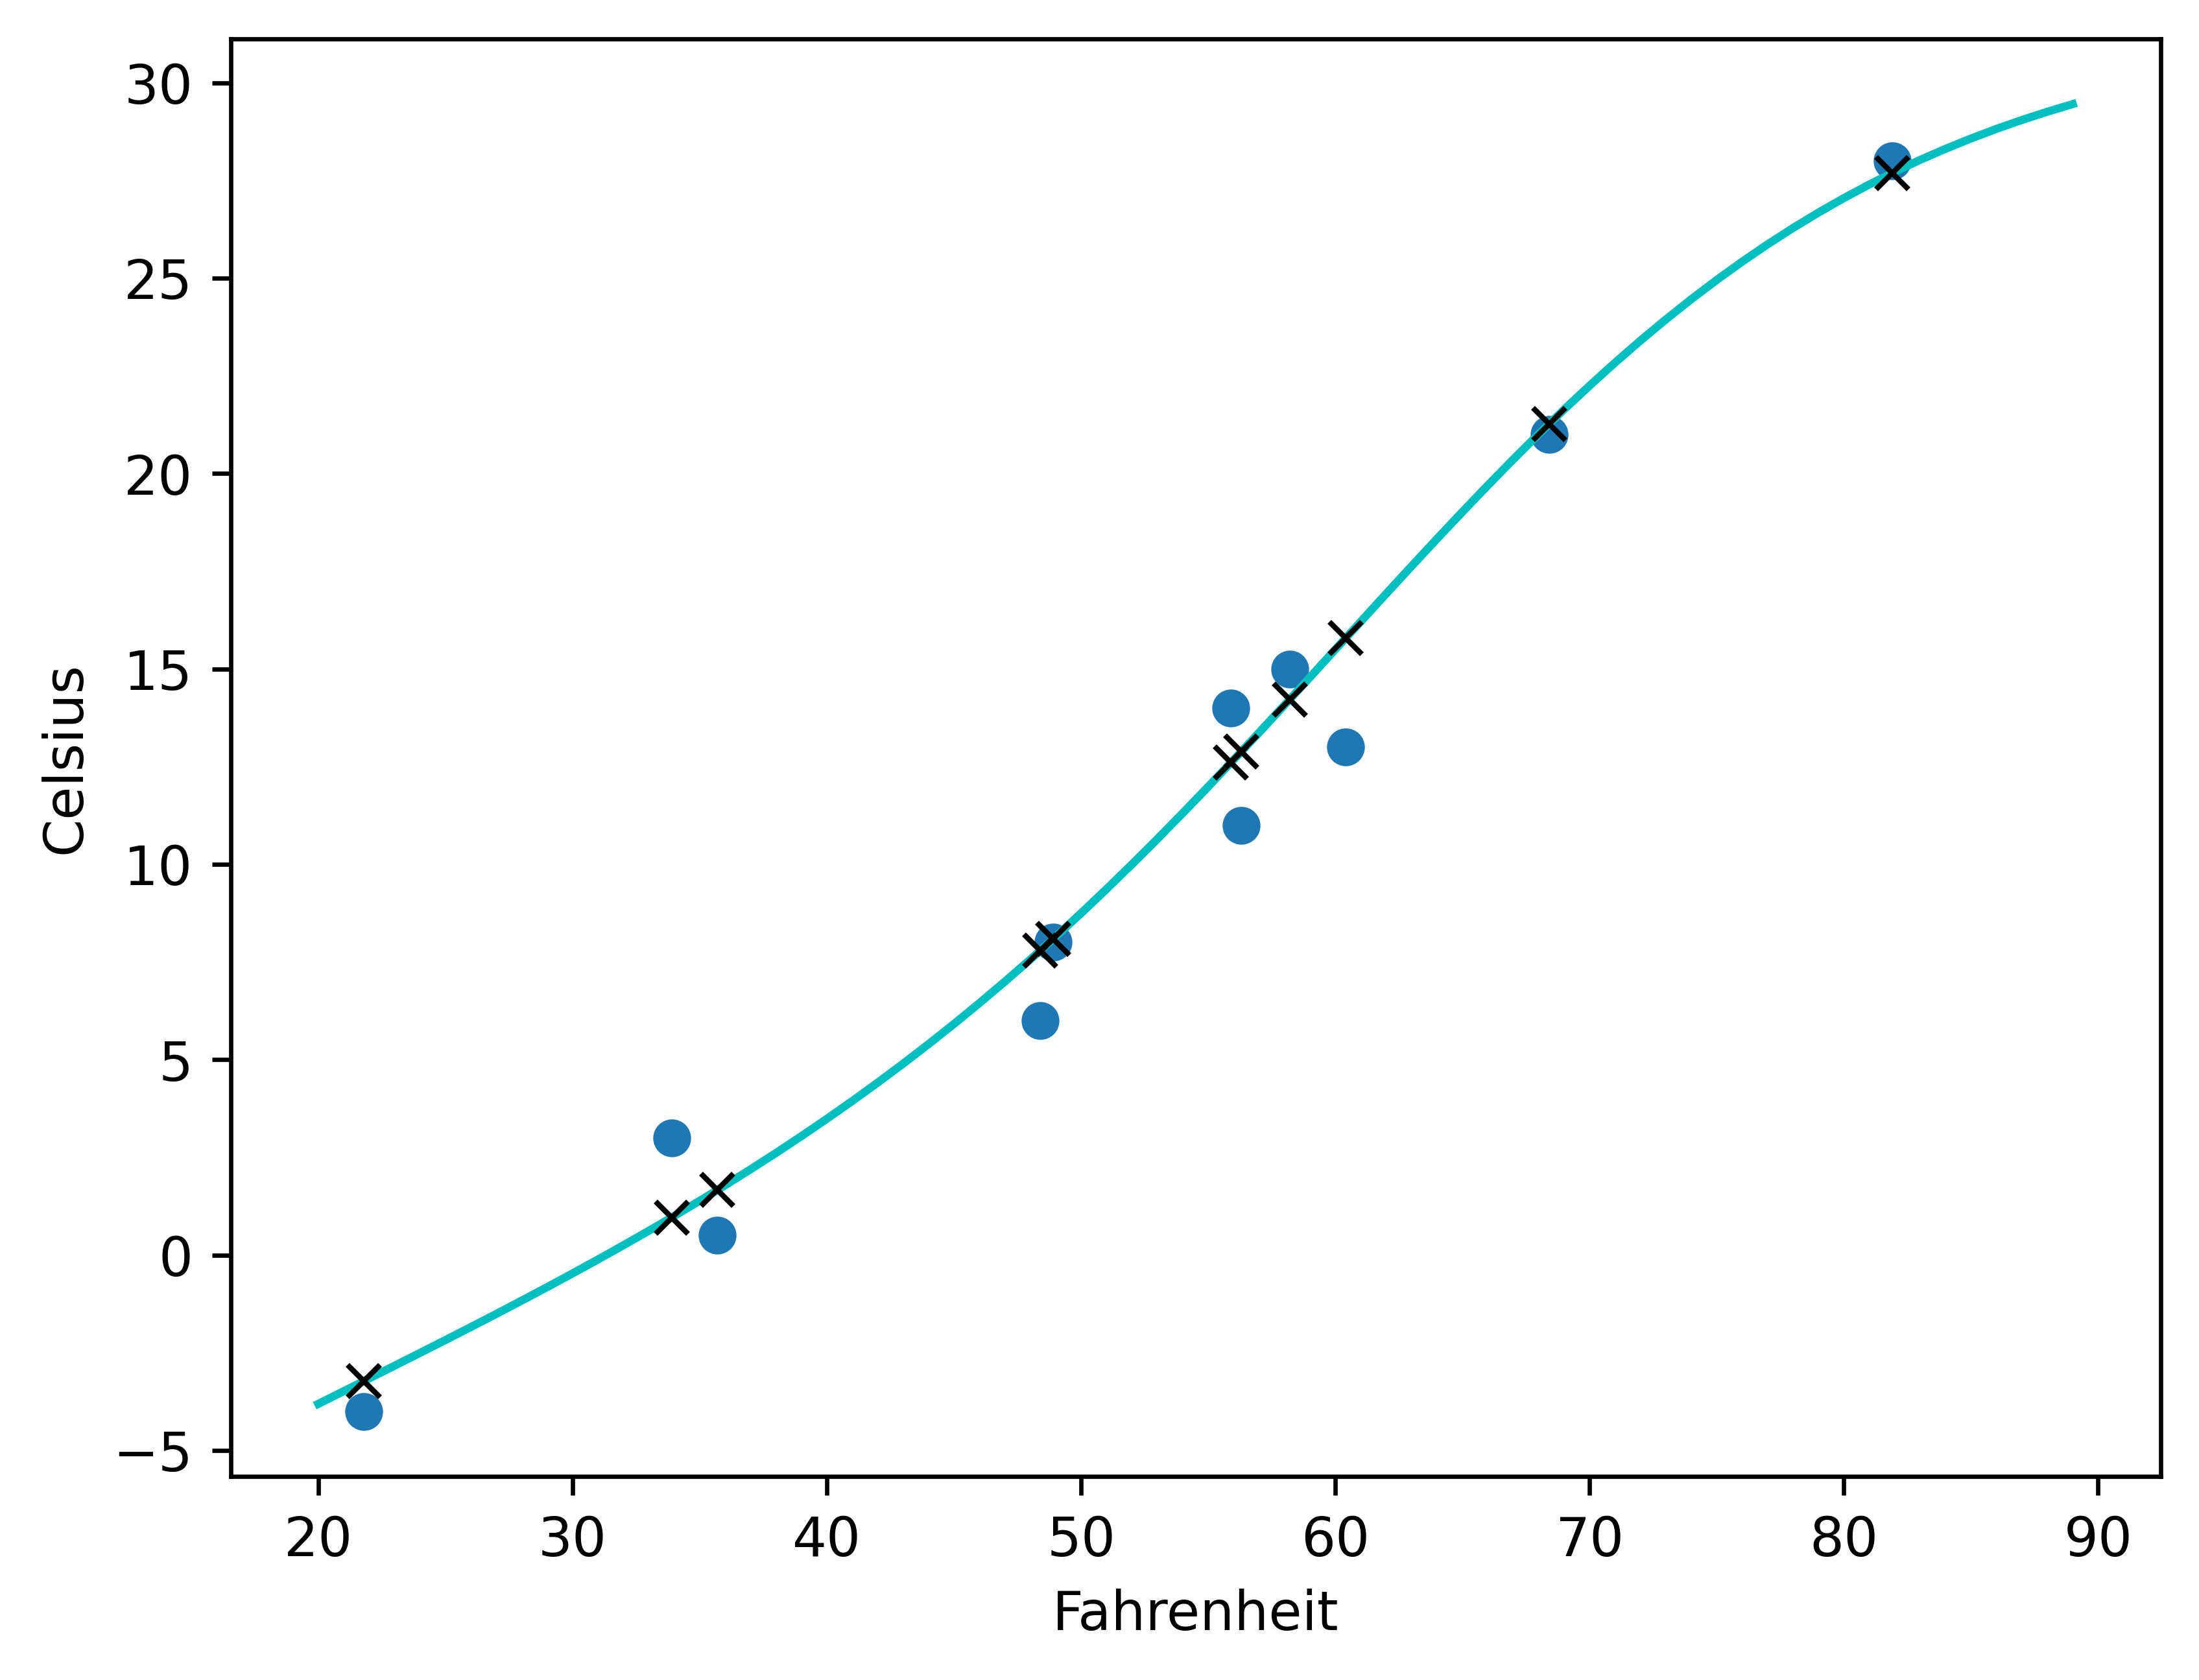

In [38]:
t_range = torch.arange(20., 90.).unsqueeze(1)
fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx') 